In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

from pandas.io.json import json_normalize

In [3]:
!mkdir -p {PATH}

In [6]:
PATH = "data/ga-customer-revenue-prediction/"

In [7]:
!ls {PATH}

test.csv  train.csv


In [9]:
!wc -l {PATH}test.csv

804685 data/ga-customer-revenue-prediction/test.csv


In [13]:
!export KAGGLE_USERNAME=vandosant && export KAGGLE_KEY=cb365ec3a8405eb7d4224b7575fba73e && kaggle competitions download -c ga-customer-revenue-prediction

  0%|                                               | 0.00/5.22M [00:00<?, ?B/s]
100%|######################################| 5.22M/5.22M [00:00<00:00, 60.1MB/s]
 92%|##################################9   | 49.0M/53.3M [00:01<00:00, 37.4MB/s]
100%|######################################| 53.3M/53.3M [00:01<00:00, 38.7MB/s]
 97%|####################################9 | 56.0M/57.5M [00:00<00:00, 63.6MB/s]
100%|######################################| 57.5M/57.5M [00:01<00:00, 60.3MB/s]


In [14]:
!ls

Ethics in Data Science.ipynb	      lesson4-mnist_sgd.ipynb
bulldozer_dl.ipynb		      lesson5-nlp.ipynb
bulldozer_linreg.ipynb		      marketdata_sample.csv
data				      news_sample.csv
excel				      ppt
ga-customer-revenue-prediction.ipynb  sample_submission.csv.zip
images				      test.csv.zip
kaggle.json			      tmp
lesson1-rf.ipynb		      train.csv.zip
lesson2-rf_interpretation.ipynb       two-sigma.ipynb
lesson3-rf_foundations.ipynb


In [15]:
!mv train.csv.zip test.csv.zip {PATH}

In [16]:
!ls {PATH}

test.csv.zip  train.csv.zip


In [17]:
!unzip {PATH}test.csv.zip

Archive:  data/ga-customer-revenue-prediction/test.csv.zip
  inflating: test.csv                


In [18]:
!unzip {PATH}train.csv.zip

Archive:  data/ga-customer-revenue-prediction/train.csv.zip
  inflating: train.csv               


In [19]:
!ls {PATH}

test.csv.zip  train.csv.zip


In [20]:
!mv test.csv {PATH}

In [21]:
!mv train.csv {PATH}

In [22]:
!ls {PATH}

test.csv  test.csv.zip	train.csv  train.csv.zip


In [5]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False, parse_dates=['date'])

In [6]:
df_raw.head().T

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00,2016-09-02 00:00:00
device,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""Firefox"", ""browserVersion"": ""not ...","{""browser"": ""Chrome"", ""browserVersion"": ""not a...","{""browser"": ""UC Browser"", ""browserVersion"": ""n...","{""browser"": ""Chrome"", ""browserVersion"": ""not a..."
fullVisitorId,1131660440785968503,377306020877927890,3895546263509774583,4763447161404445595,27294437909732085
geoNetwork,"{""continent"": ""Asia"", ""subContinent"": ""Western...","{""continent"": ""Oceania"", ""subContinent"": ""Aust...","{""continent"": ""Europe"", ""subContinent"": ""South...","{""continent"": ""Asia"", ""subContinent"": ""Southea...","{""continent"": ""Europe"", ""subContinent"": ""North..."
sessionId,1131660440785968503_1472830385,377306020877927890_1472880147,3895546263509774583_1472865386,4763447161404445595_1472881213,27294437909732085_1472822600
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
totals,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",..."
trafficSource,"{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ...","{""campaign"": ""(not set)"", ""source"": ""google"", ..."
visitId,1472830385,1472880147,1472865386,1472881213,1472822600


In [18]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', 50):
    display(df_raw)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600
...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,2017-01-04,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5123779100307500332,"{""continent"": ""Americas"", ""subContinent"": ""Car...",5123779100307500332_1483554750,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""17"", ""pageviews"": ""15...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483554750,1,1483554750
903649,Social,2017-01-04,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7231728964973959842,"{""continent"": ""Asia"", ""subContinent"": ""Souther...",7231728964973959842_1483543798,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""18"", ""pageviews"": ""13...","{""referralPath"": ""/yt/about/"", ""campaign"": ""(n...",1483543798,1,1483543798
903650,Social,2017-01-04,"{""browser"": ""Android Webview"", ""browserVersion...",5744576632396406899,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",5744576632396406899_1483526434,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""21...","{""referralPath"": ""/yt/about/ko/"", ""campaign"": ...",1483526434,1,1483526434
903651,Social,2017-01-04,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2709355455991750775,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",2709355455991750775_1483592857,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""24"", ""pageviews"": ""22...","{""referralPath"": ""/l.php"", ""campaign"": ""(not s...",1483592857,1,1483592864


In [8]:
df_raw.totals.head(1).T

0    {"visits": "1", "hits": "1", "pageviews": "1",...
Name: totals, dtype: object

In [9]:
import json

In [60]:
df_raw.totals = json_normalize(df_raw.totals.apply(json.loads))

In [27]:
df_raw['transactionRevenue'] = df_raw['totals'].map(lambda x: float(json.loads(x).get('transactionRevenue', 0.0)))

In [28]:
df_raw['transactionRevenue'].sum()

1540071240000.0

### Save to file

In [29]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/ga-customer-revenue-prediction')

### Open feather data

In [5]:
df_raw = pd.read_feather('tmp/ga-customer-revenue-prediction')

In [12]:
df_raw.sort_values(by=['transactionRevenue'], ascending=False).head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,transactionRevenue
375253,Display,2017-04-05,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1491423580,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""58"", ""pageviews"": ""40...","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1491423580,243,1491423580,2.312950e+10
430822,Direct,2017-02-14,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1487097028,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""91"", ""pageviews"": ""64...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1487097028,181,1487097028,1.785550e+10
380988,Direct,2016-09-16,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",5632276788326171571,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5632276788326171571_1474035643,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""136"", ""pageviews"": ""8...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1474035643,5,1474035643,1.602375e+10
773715,Direct,2017-07-18,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9417857471295131045,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",9417857471295131045_1500404409,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""41"", ""pageviews"": ""30...","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1500404409,8,1500404409,1.058914e+10
891576,Display,2017-03-24,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1490380560,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""50"", ""pageviews"": ""39...","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1490380560,237,1490380560,8.677830e+09


In [14]:
df_raw['transactionRevenueLog'] = np.log(df_raw.transactionRevenue)

/opt/conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [16]:
add_datepart(df_raw, 'date')

In [19]:
df_raw.Year.head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: Year, dtype: int64

In [20]:
train_cats(df_raw)

In [21]:
df_raw.head()

,channelGrouping,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,...,2,4,246,False,False,False,False,False,False,1472774400
1,Organic Search,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,...,2,4,246,False,False,False,False,False,False,1472774400
2,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,...,2,4,246,False,False,False,False,False,False,1472774400
3,Organic Search,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,...,2,4,246,False,False,False,False,False,False,1472774400
4,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,...,2,4,246,False,False,False,False,False,False,1472774400


In [23]:
df_raw.isnull().sum().sort_index()/len(df_raw)

Day                      0.0
Dayofweek                0.0
Dayofyear                0.0
Elapsed                  0.0
Is_month_end             0.0
Is_month_start           0.0
Is_quarter_end           0.0
Is_quarter_start         0.0
Is_year_end              0.0
Is_year_start            0.0
Month                    0.0
Week                     0.0
Year                     0.0
channelGrouping          0.0
device                   0.0
fullVisitorId            0.0
geoNetwork               0.0
sessionId                0.0
socialEngagementType     0.0
totals                   0.0
trafficSource            0.0
transactionRevenue       0.0
transactionRevenueLog    0.0
visitId                  0.0
visitNumber              0.0
visitStartTime           0.0
dtype: float64

In [24]:
df_raw.head()

,channelGrouping,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,...,2,4,246,False,False,False,False,False,False,1472774400
1,Organic Search,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,...,2,4,246,False,False,False,False,False,False,1472774400
2,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,...,2,4,246,False,False,False,False,False,False,1472774400
3,Organic Search,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,...,2,4,246,False,False,False,False,False,False,1472774400
4,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,...,2,4,246,False,False,False,False,False,False,1472774400


In [26]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/ga-customer-revenue-prediction')

### Pre-processing

In [18]:
df_raw = pd.read_feather('tmp/ga-customer-revenue-prediction')

In [23]:
json.loads(df_raw['device'][0]).keys()

dict_keys(['browser', 'browserVersion', 'browserSize', 'operatingSystem', 'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding', 'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo', 'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors', 'screenResolution', 'deviceCategory'])

In [28]:
for k in json.loads(df_raw['totals'][0]).keys():
    print(k)
    df_raw[k] = df_raw['totals'].map(lambda x: int(json.loads(x).get(k, 0)))

visits
hits
pageviews
bounces
newVisits


In [26]:
for k in json.loads(df_raw['device'][0]).keys():
    print(k)
    df_raw[k] = df_raw['device'].map(lambda x: json.loads(x).get(k))

browser
browserVersion
browserSize
operatingSystem
operatingSystemVersion
isMobile
mobileDeviceBranding
mobileDeviceModel
mobileInputSelector
mobileDeviceInfo
mobileDeviceMarketingName
flashVersion
language
screenColors
screenResolution
deviceCategory


In [36]:
for k in json.loads(df_raw['trafficSource'][0]).keys():
    print(k)
    if k == 'adwordsClickInfo':
        continue
    else:
        df_raw[k] = df_raw['trafficSource'].map(lambda x: json.loads(x).get(k))

campaign
source
medium
keyword
adwordsClickInfo


In [38]:
for k in json.loads(df_raw['geoNetwork'][0]).keys():
    print(k)
    df_raw[k] = df_raw['geoNetwork'].map(lambda x: json.loads(x).get(k))

continent
subContinent
country
region
metro
city
cityId
networkDomain
latitude
longitude
networkLocation


In [39]:
df_raw.head()

,channelGrouping,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,...,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,...,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Organic Search,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,...,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,...,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Organic Search,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,...,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Organic Search,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,...,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [41]:
without_json = df_raw.drop(['device', 'totals', 'trafficSource', 'geoNetwork'], axis=1)

In [53]:
without_json.head()

,channelGrouping,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,transactionRevenue,transactionRevenueLog,Year,...,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Organic Search,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,0.0,-inf,2016,...,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Organic Search,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,0.0,-inf,2016,...,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Organic Search,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,0.0,-inf,2016,...,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Organic Search,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,0.0,-inf,2016,...,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Organic Search,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,0.0,-inf,2016,...,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [55]:
without_json.drop(['transactionRevenueLog'], axis=1, inplace=True)

In [56]:
train_cats(without_json)

In [57]:
df, y, nas = proc_df(without_json, 'transactionRevenue')

In [58]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.7406146313106007

In [59]:
os.makedirs('tmp', exist_ok=True)
without_json.to_feather('tmp/ga-customer-revenue-prediction')

### Basic Model

In [11]:
df_raw = pd.read_feather('tmp/ga-customer-revenue-prediction')

In [74]:
df_raw.drop(['sessionId', 'campaign'], axis=1, inplace=True)

In [76]:
df_raw.to_feather('tmp/ga-customer-revenue-prediction')

In [77]:
df, y, nas = proc_df(df_raw, 'transactionRevenue')

In [78]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [79]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 804685  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((98968, 54), (98968,), (804685, 54))

In [80]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2.88 s, sys: 36 ms, total: 2.92 s
Wall time: 774 ms
[1.1948652194942408, 1.7978236848474463, 0.6757002479911743, 0.18525972599305407]


### Speeding up

In [27]:
df_trn, y_trn, nas = proc_df(df_raw, 'transactionRevenue', subset=100000, na_dict=nas)
X_train, _ = split_vals(df_trn, n_valid)
y_train, _ = split_vals(y_trn, n_valid)

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 4.86 s, sys: 28 ms, total: 4.89 s
Wall time: 931 ms
[0.7439730104834018, 1.7888535163904895, 0.8579309512231333, 0.1760236347510047]


### Single Tree

In [29]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[1.7158139928171265, 1.736321840118322, 0.24434158710356446, 0.2237070310970868]


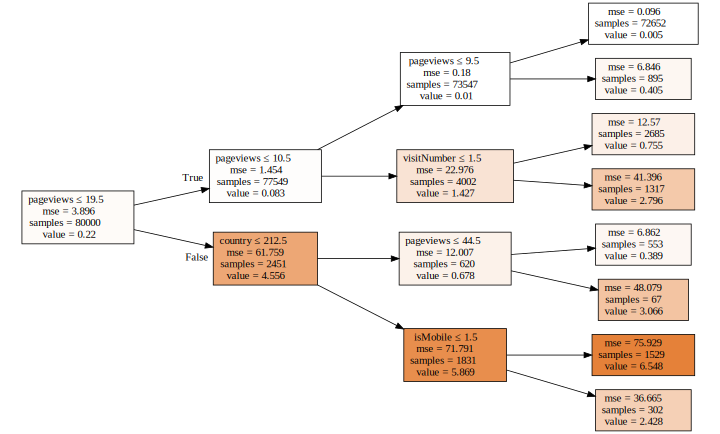

In [30]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [31]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[4.926943218476052e-07, 2.420263524246657, 0.9999999999999376, -0.5083096438937176]


### Bagging

In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.7350160790428573, 1.791580692901914, 0.8613311893397028, 0.17350935184713823]


In [33]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0.0, 0.0)

In [34]:
preds.shape

(10, 80000)

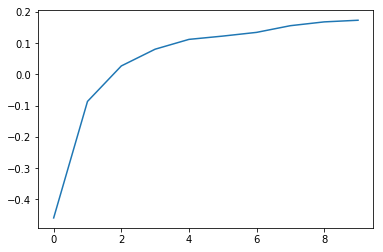

In [35]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [36]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.6847283175886417, 1.744840869461989, 0.8796567629802039, 0.216070789970081]


In [37]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.6511138364987727, 1.7165546167063903, 0.8911824458746241, 0.24128189242933107]


In [38]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.636997679272665, 1.7043012195621763, 0.895849631358601, 0.25207524785330915]


### Out of bag

In [39]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.6502929793942163, 1.7282295804756826, 0.8914566448007545, 0.2309261137957308, 0.2215245978012541]


### Subsampling

In [15]:
df_trn, y_trn, nas = proc_df(df_raw, 'transactionRevenue')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [16]:
set_rf_samples(50000)

In [17]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 3.78 s, sys: 92 ms, total: 3.87 s
Wall time: 1.12 s
[1.1703988589458922, 1.7854790047356208, 0.6888451630679902, 0.19641007152285317, 0.1718476031713988]


In [18]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.0847614477462035, 1.7173464097592361, 0.7327133541146527, 0.2565687672420762, 0.27825254563684787]


### Parameter tuning

In [19]:
reset_rf_samples()

In [20]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [21]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.6889156930636381, 1.7338466929313503, 0.8921944963836252, 0.24221434732042535, 0.2368045392510315]


In [22]:
t=m.estimators_[0].tree_

In [23]:
dectree_max_depth(t)

24

In [24]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.2429579842571739, 1.693871217427562, 0.6490690484847753, 0.2767544561518499, 0.28892608115534246]


In [25]:
t=m.estimators_[0].tree_

In [26]:
dectree_max_depth(t)

21

In [27]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.063514880204073, 1.7021589760508136, 0.743081180074836, 0.2696597628438394, 0.27906770490176613]


#### subsampling columns / features

In [53]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.0257771899245578, 1.6522121782015962, 0.7387475431080445, 0.2970946731363936, 0.29950440293866754]


### Feature importance

In [44]:
reset_rf_samples()

In [47]:
df_trn, y_trn, nas = proc_df(df_raw, 'transactionRevenue')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [48]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.0675050522089502, 1.7063501750694612, 0.7411497103448368, 0.2660587245673933, 0.271929983745997]


In [49]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
22,pageviews,0.309035
47,country,0.067125
21,hits,0.064544
2,sessionId,0.054916
6,visitStartTime,0.051642
1,fullVisitorId,0.050393
5,visitNumber,0.049474
4,visitId,0.043003
52,networkDomain,0.034595
10,Day,0.032224


In [50]:
len(fi)

56

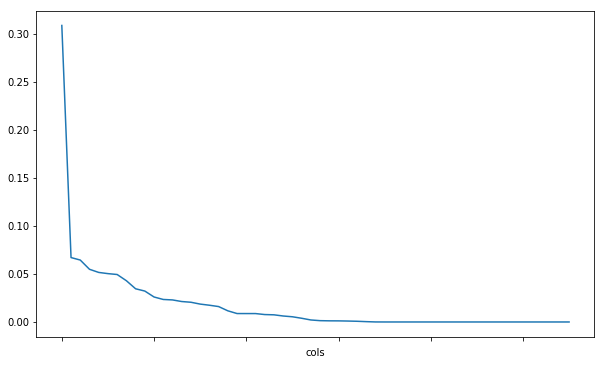

In [51]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [52]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

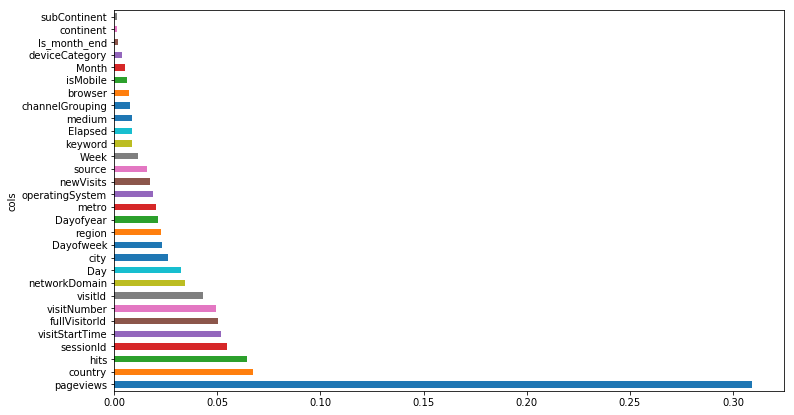

In [53]:
plot_fi(fi[:30]);

In [54]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

26

In [55]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [62]:
m = RandomForestRegressor(n_estimators=60, min_samples_leaf=7, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.3657377271600213, 1.6772279456628771, 0.5763147058611423, 0.2908972503623415, 0.306631410286232]


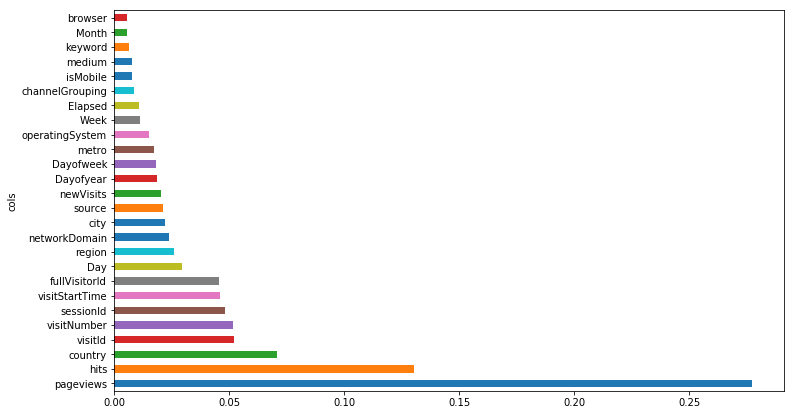

In [37]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

### Confidence based on tree variance

In [63]:
set_rf_samples(50000)

In [64]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.3261158028858775, 1.68922993796949, 0.6005414897875464, 0.2807124734847314, 0.29650936758498525]


In [65]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1min 29s, sys: 19.2 s, total: 1min 48s
Wall time: 13 s


(0.0, 0.0)

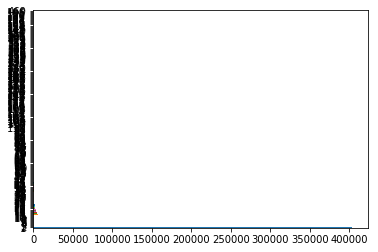

In [68]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.pageviews.value_counts().plot.barh();

In [69]:
flds = ['pageviews', 'transactionRevenue', 'pred', 'pred_std']
enc_summ = x[flds].groupby('pageviews', as_index=False).mean()
enc_summ

,pageviews,transactionRevenue,pred,pred_std
0,0,0.000000,0.003667,0.022899
1,1,0.000000,0.000859,0.004691
2,2,0.000578,0.000879,0.004871
3,3,0.000539,0.001489,0.007906
4,4,0.003045,0.003409,0.017012
5,5,0.006194,0.010063,0.048003
6,6,0.006293,0.023554,0.110505
7,7,0.021423,0.059634,0.272879
8,8,0.096831,0.156313,0.558044
9,9,0.193644,0.225469,0.763508


### One-hot encoding

In [85]:
reset_rf_samples()

In [86]:
df_trn2, y_trn, nas = proc_df(df_raw, 'transactionRevenue', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.086432835362372, 1.6920762131309273, 0.731889055359625, 0.27828649822846396, 0.2824048423035177]


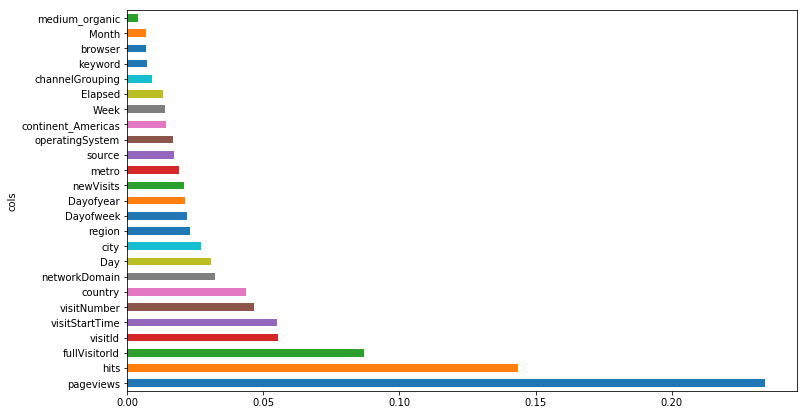

In [87]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [ ]:
test_df = pd.read_csv(f'{PATH}test.csv', low_memory=False)
test_id = test_df["fullVisitorId"].values

In [97]:
?m

Type:        RandomForestRegressor
String form:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0. <...> imators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)
Length:      40
File:        /opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py
Docstring:  
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and use averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

criterion : string, optional (default="mse")
    The function to measure the quality of a split. S

In [98]:
preds = m.predict(test_df)

ValueError: could not convert string to float: '{"referralPath": "/yt/music/ru/index.html", "campaign": "(not set)", "source": "youtube.com", "medium": "referral", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}}'

In [93]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
sub_df = df_trn2.groupby("fullVisitorId")["transactionRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "transactionRevenue"]
sub_df["PredictedLogRevenue"] = sub_df["transactionRevenue"]
sub_df.to_csv("subm1.csv", index=False)

KeyError: 'Column not found: transactionRevenue'